In [1]:
import pymc

In [2]:
print(f"Running on PyMC v{pymc.__version__}")

Running on PyMC v5.10.4


In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import arviz as az

## Week 5 Homework

---

### Q1: Questions about PyMC...

Complete this formatted markdown listing of the contents of "PyMC Example Gallery". *Include links and your favorite image (right click and "copy image address") from each page.*


#### Introductory

- [General Overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)
- [Simple Linear Regression](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html)
- [General API quickstart](https://www.pymc.io/projects/examples/en/latest/introductory/api_quickstart.html)

| | | |
|-|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/ac30f30b2297ec4f2bb798b4f28d2cbba2d0502dbaae4a5f78fdd5cccacda517.svg)|<img src="https://www.pymc.io/projects/docs/en/stable/_images/a8276d1222c43c061dbfff6fa3ff3af15b86038fd7d1e204c429ae3714ea1a20.png"  width="500"/>|![](https://www.pymc.io/projects/examples/en/latest/_images/434538d8660bf2399ebf9df11cbd2b7cec62d8abafc588da625315074b628118.png)|

#### Library Fundamentals

- Distribution Dimensionality
- PyMC and PyTensor
- Using Data Containers

| | | |
|-|-|-|
|1|2|3|


#### Etc.

- 1.
- 2.
- 3.
- 4.
- 5.
- 6.
- 7.
- 8.
- 9.
- 10.
- 11.
- 12.
- 13.


| | | | |
|-|-|-|-|
|1|2|3|4|
|5|6|7|8|
|9|10|11|12|

Etc.


### Q2: Continue "Q2" of the previous weeks 3 and 4

1. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a normal distribution and your prior for $\tau$ is a gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

2. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a non normal distribution and your prior for $\tau$ is a non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

3. *Use PyMC to provide Bayesian inference for the paramaters associated with a sample of normal data where your prior for theta is a yet another different again non normal distribution and your prior for $\tau$ is a yet another different again non-gamma distribution. Provide diagnostic assessments of the performance of your algorithm.*

### Q3: Slice Sampling

*First explain how the Markov algorithm of slice sampling as given below works. Then explain the steps by which slice sampling could be used in place of a Metropolis-Hasting step in a Metropolis within Gibbs algorithm where the full conditionals are only known up to a normalizing constant. In your explanation clarify what the curve that we're sampling beneath is, and what the initial value and steps are to create the draw for Gibbs sampling.*

In [5]:
def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):
    
    # find interval of grid points where f(x_grid) > y 
    # then extend the enterval so endpoints f(a)<y and f(b)<y 
    x_grid_delta = x_grid[1]-x_grid[0]
    a,b = x_grid[f(x_grid)>y][[0,-1]]+[-x_grid_delta,x_grid_delta]
    # a,b = x_grid[0,-1]  # make the interval all of x_grid
    
    x_ = a + stats.uniform().rvs()*(b-a)    
    if f(x_)>y:
        return x_,1  # in 1 try if f(x_)>y and "x_ is under f" 
    elif x_ < x:  # or if "x_ was above f on the left side of the interval" 
        x_l,x_r = x_,b
    else:
        x_l,x_r = a,x_  # or if "x_ was above f on the right side of the interval"
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = 2)  # try again with a reduced interval

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):
    
    x_ = x_l + stats.uniform().rvs()*(x_r-x_l)
    
    if f(x_)>y:
        return x_,tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = tot+1)


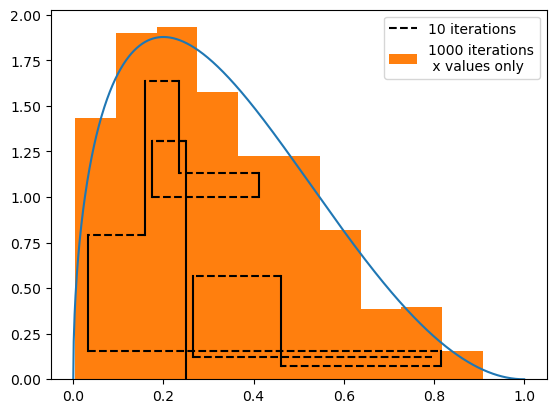

In [6]:
x_grid = np.linspace(0,1,1000)
f = lambda x: stats.beta(1.5,3).pdf(x)
plt.plot(x_grid, f(x_grid))
    
m = 1000
x = np.zeros([m+1,3])
x[:2,0] = 0.25

plot_trace = 10
for t in range(1,m):
    
    x[t,1] = stats.uniform().rvs()*f(x[t,0])
    if t < plot_trace:
        plt.plot([x[t,0]]*2, [x[t-1,1],x[t,1]], 'k')
    
    x[t+1,0],x[t+1,2] = slice_f_at_y(f, x[t,0], x[t,1])
    if t < plot_trace:
        if t==1:
            plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--', label=str(plot_trace)+ " iterations")
        plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--')
    
plt.hist(x[:,0], density=True, label=str(m)+" iterations\n x values only")
plt.legend();

### Q1: Questions about PyMC...
Below is a listing of the contents of the [PyMC Example Gallery](https://www.pymc.io/projects/examples/en/latest/). Each section includes links to the official pages and one of my favorite images from that page.
---


#### Introductory

- [General Overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)
- [Simple Linear Regression](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html)
- [General API quickstart](https://www.pymc.io/projects/examples/en/latest/introductory/api_quickstart.html)

|                                                                                                                   |                                                                                                                                        |                                                                                                                                        |
|:-----------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|
| ![](https://www.pymc.io/projects/docs/en/stable/_images/ac30f30b2297ec4f2bb798b4f28d2cbba2d0502dbaae4a5f78fdd5cccacda517.svg) | <img src="https://www.pymc.io/projects/docs/en/stable/_images/a8276d1222c43c061dbfff6fa3ff3af15b86038fd7d1e204c429ae3714ea1a20.png" width="500"/> | ![](https://www.pymc.io/projects/examples/en/latest/_images/434538d8660bf2399ebf9df11cbd2b7cec62d8abafc588da625315074b628118.png) |

---

#### Library Fundamentals

- [Distribution Dimensionality](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html#posterior-predictive)
- [PyMC and PyTensor](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_pytensor.html#pymc-pytensor)
- [Using Data Containers](https://www.pymc.io/projects/examples/en/latest/fundamentals/data_container.html)

|                                                                                                                                        |                                                                                                                                        |                                                                                                                                        |
|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|
| ![](https://www.pymc.io/projects/docs/en/stable/_images/73352774c2286019a31b211a29ee527bace6cc46ab421aa3e4c3f572a6658da5.svg) | ![](https://raw.githubusercontent.com/pymc-devs/pytensor/main/doc/tutorial/apply.png) | ![](https://www.pymc.io/projects/examples/en/latest/_images/90f5f05f83d677cb540fc16bcf5962b15949b9cf531848fe6b20c02a7e271e24.svg) |

---

#### Etc.

Below are more advanced or specialized examples from the gallery:

1. [GLM: Robust Linear Regression](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-robust.html)  
2. [Binomial regression](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-binomial-regression.html)  
3. [GLM: Negative Binomial Regression](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-negative-binomial-regression.html) 
4. [GLM: Poisson Regression](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-poisson-regression.html)  
5. [Bayesian Estimation Supersedes the T-Test](https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html)  
6. [Interrupted time series analysis](https://www.pymc.io/projects/examples/en/latest/causal_inference/interrupted_time_series.html)  
7. [Bayesian Non-parametric Causal Inference](https://www.pymc.io/projects/examples/en/latest/causal_inference/bayesian_nonparametric_causal.html)  
8. [Bayesian mediation analysis](https://www.pymc.io/projects/examples/en/latest/causal_inference/mediation_analysis.html)  
9. [Stochastic Volatility model](https://www.pymc.io/projects/examples/en/latest/time_series/stochastic_volatility.html)  
10. [Bayes Factors and Marginal Likelihood](https://www.pymc.io/projects/examples/en/latest/diagnostics_and_criticism/Bayes_factor.html)  
11. [Categorical regression](https://www.pymc.io/projects/examples/en/latest/bart/bart_categorical_hawks.html)  
12. [Gaussian Mixture Model](https://www.pymc.io/projects/examples/en/latest/mixture_models/gaussian_mixture_model.html)  
13. [Bayesian Survival Analysis](https://www.pymc.io/projects/examples/en/latest/survival_analysis/survival_analysis.html)

|                                                                                                                                        |                                                                                                                                        |                                                                                                                                        |                                                                                                                                        |
|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------:|
| **1**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/cca03e23e9627b2fb5f4156cb11fa372d2c3f72389827aa6cfb4f0503abc80ab.png) | **2**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/2af54aa3c6d0dcc893750608896f94dc41d623fee75756f05e3e97b629e9718a.png) | **3**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/26e650782d73f95310b3fda053366e4f2a9df307cc35e9ed09f3a2fecc1ed06d.png) | **4**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/c2a7d0d9976f8423e0420f0ef0f22992f312119f6def0f7e9a3f6389be9e8e89.png) |
| **5**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/073035d65700ed87439b543ebee2d98e340346030646fed769fb9ec5d135f21f.png)  | **6**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/66a6c14b531ea70dc05928d110200706908ae8e29bf312a96cdeeca168db4e84.png)  | **7**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/9b9d722a04dc6890f3936227207047f8055318154b3eb1434fa4dd3dbb525de2.svg)  | **8**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/b8423726013c43fe09cb7ebdddd0bf7b3f51c0749cdc183173b4dc6711013b72.png)  |
| **9**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/6390028c025e1d66c40374fc3238fd8454cf661cd30a07a7e43fe34dc1cae992.png)   | **10**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/93c562d90c210b4eee9731f7e3adf06f4c54bf60db206322ea41262dc16c6290.png)   | **11**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/5aef36de4f892b86b3c20ec45bf0f3b04c6732fe7ae87bb3c358e72362e34e60.png)  | **12**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/be9b6ee2d6c50c4472ef2968ae6fab25860073371be2aa29ebade1adf9952628.png) |
| **13**<br>![](https://www.pymc.io/projects/examples/en/latest/_images/2c04c31345c03756d20a72ca9e07f6969a4dcbb74b22a86a198bc6b1b6b61dd6.png) | — | — | — |




## Q2: Bayesian Inference with Different Priors

Analyze three different cases:
1. **Case 1:** Normal prior for $( \theta $), Gamma prior for $( \tau $).
2. **Case 2:** Non-normal prior for $( \theta $), Non-gamma prior for $( \tau $).
3. **Case 3:** Another different non-normal and non-gamma prior for $( \theta $) and $( \tau $).

For each case, we will:
- Define the Bayesian model.
- Perform inference using Markov Chain Monte Carlo (MCMC).
- Diagnose the inference results using trace plots, autocorrelation, and effective sample sizes.


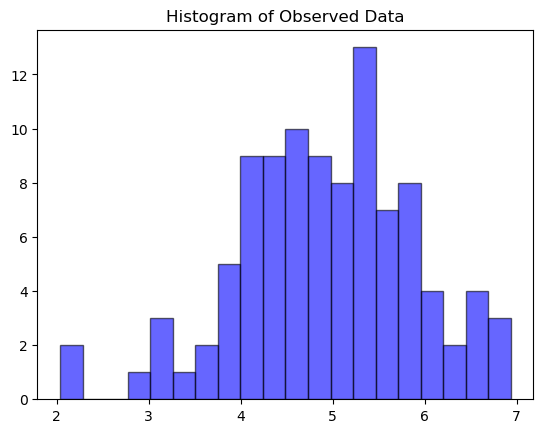

In [7]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Generate synthetic normal data
np.random.seed(365)
n_samples = 100
true_theta = 5
true_tau = 1

data = np.random.normal(loc=true_theta, scale=1/np.sqrt(true_tau), size=n_samples)
plt.hist(data, bins=20, alpha=0.6, color='b', edgecolor='black')
plt.title("Histogram of Observed Data")
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


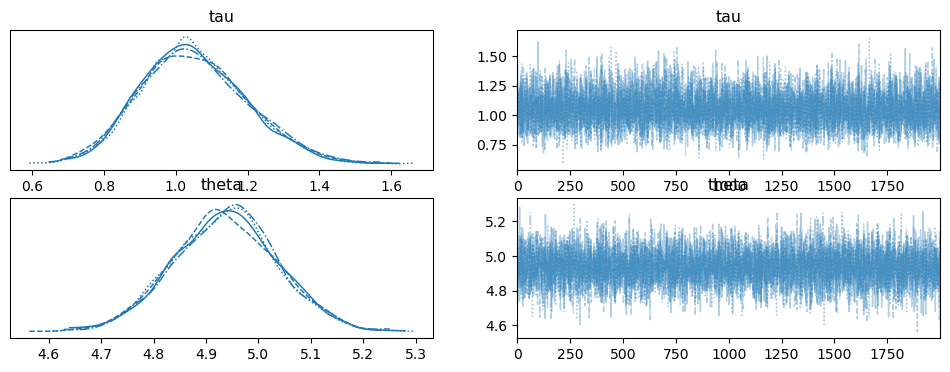

In [8]:
# Case 1
with pm.Model() as model_1:
    theta = pm.Normal("theta", mu=0, sigma=10)
    tau = pm.Gamma("tau", alpha=2, beta=2)
    y_obs = pm.Normal("y_obs", mu=theta, sigma=1/pm.math.sqrt(tau), observed=data)
    trace_1 = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace_1)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


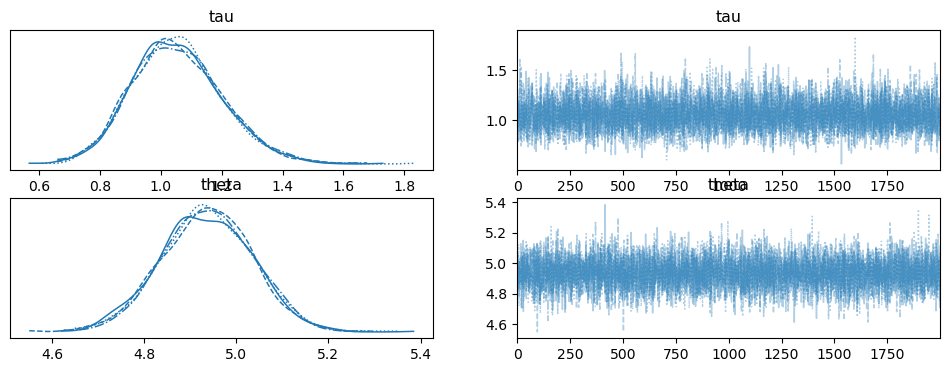

In [9]:
# Case 2
with pm.Model() as model_2:
    theta = pm.StudentT("theta", nu=3, mu=0, sigma=10)
    tau = pm.Exponential("tau", lam=1)
    y_obs = pm.Normal("y_obs", mu=theta, sigma=1/pm.math.sqrt(tau), observed=data)
    trace_2 = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace_2)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


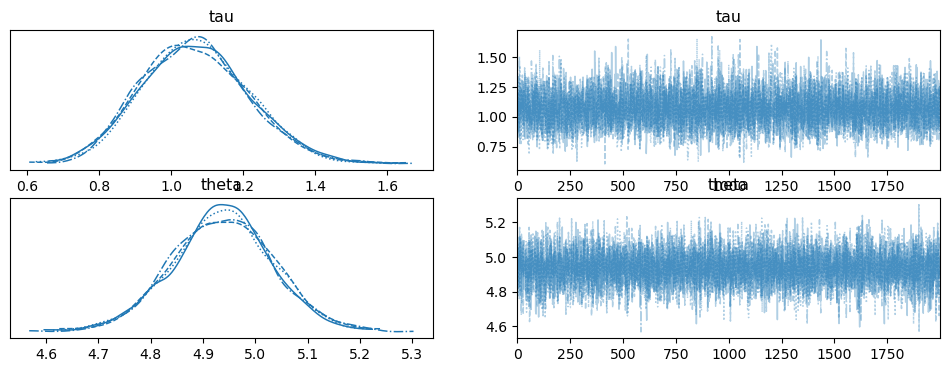

In [10]:
# Case 3
with pm.Model() as model_3:
    theta = pm.Laplace("theta", mu=0, b=10)
    tau = pm.HalfNormal("tau", sigma=2)
    y_obs = pm.Normal("y_obs", mu=theta, sigma=1/pm.math.sqrt(tau), observed=data)
    trace_3 = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace_3)
plt.show()

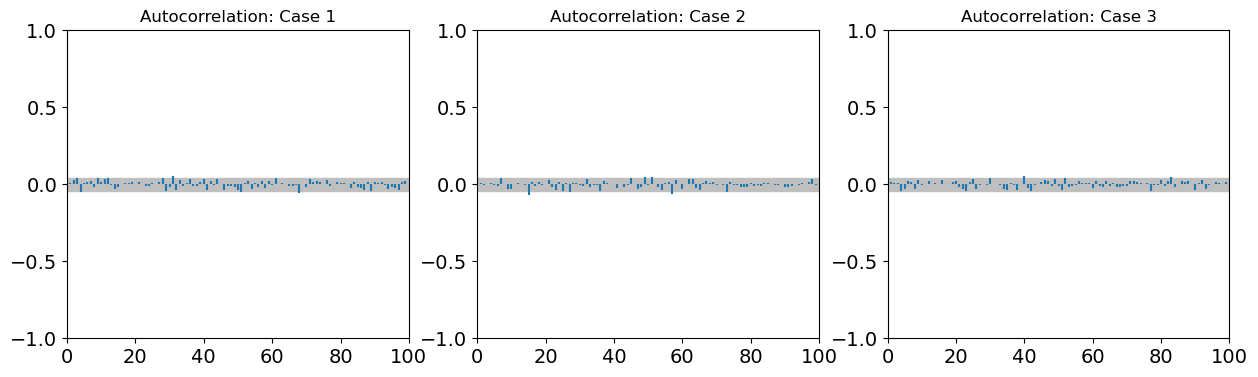

In [11]:
# Compare autocorrelation plots for the three models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

az.plot_autocorr(trace_1, var_names=["theta"], ax=axes[0])
axes[0].set_title("Autocorrelation: Case 1")

az.plot_autocorr(trace_2, var_names=["theta"], ax=axes[1])
axes[1].set_title("Autocorrelation: Case 2")

az.plot_autocorr(trace_3, var_names=["theta"], ax=axes[2])
axes[2].set_title("Autocorrelation: Case 3")

plt.show()

# Q3: Slice Sampling

## Explanation of Slice Sampling

### **1. How Slice Sampling Works (Markov Chain Perspective)**
Slice sampling is a Markov Chain Monte Carlo (MCMC) method that allows us to sample from a probability distribution when direct sampling is difficult. The algorithm works as follows:

1. **Define the target distribution** $( f(x) $) from which we want to sample.
2. **Introduce an auxiliary variable** $( y $) such that $( y \leq f(x) $). This creates a "slice" region under the curve of $( f(x) $).
3. **Sample $( y $) uniformly** from $( [0, f(x)] $), ensuring that we only sample within the probability density function.
4. **Find the interval where $( f(x) $) is above $( y $)**.
5. **Sample a new $( x $) value** uniformly from this interval.
6. **Repeat the process**, ensuring the Markov Chain explores the space properly.

### **2. How Slice Sampling Replaces Metropolis-Hastings in Gibbs Sampling**
In Metropolis-Hastings (MH), we often face the challenge of choosing a proposal distribution and ensuring a valid acceptance probability. In Gibbs sampling, each parameter is updated using its conditional distribution, but in some cases, we only know the conditional distribution up to a normalizing constant.

Slice sampling can replace MH in such cases because:
- It does **not require an acceptance-rejection step**.
- It can **sample directly from the conditional distribution** without knowing the normalizing constant.
- It efficiently **explores the full conditional distributions**, making it ideal for Gibbs sampling.

Thus, when full conditionals are known only up to a normalizing constant, slice sampling allows efficient sampling without requiring a Metropolis adjustment.


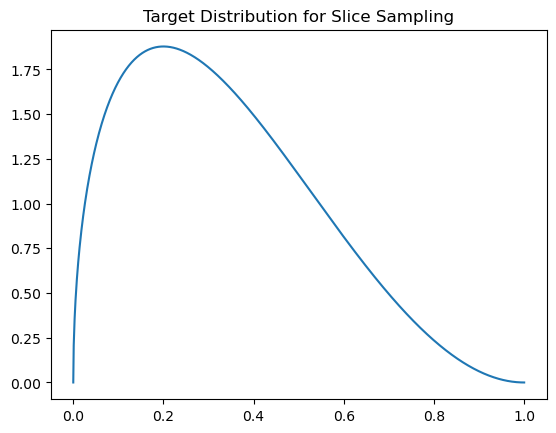

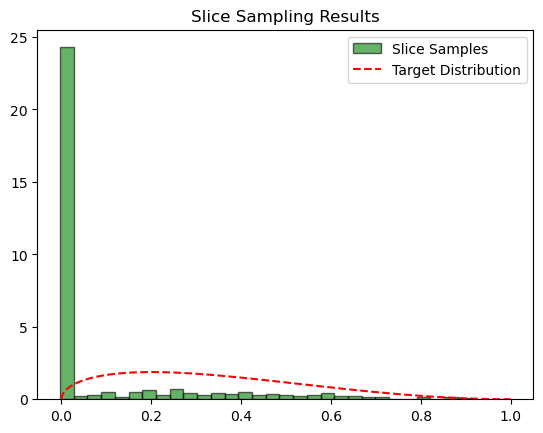

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the function we are sampling from (a Beta(1.5,3) distribution)
x_grid = np.linspace(0, 1, 1000)
f = lambda x: stats.beta.pdf(x, 1.5, 3)  # Target distribution

# Plot the function
plt.plot(x_grid, f(x_grid))
plt.title("Target Distribution for Slice Sampling")
plt.show()

# Slice Sampling Function
def slice_sample(f, x0, n_samples=1000):
    samples = np.zeros(n_samples)
    x = x0

    for i in range(n_samples):
        # Step 1: Sample y uniformly from (0, f(x))
        y = np.random.uniform(0, f(x))
        
        # Step 2: Find the slice (interval where f(x) > y)
        x_l, x_r = x, x
        while f(x_l) > y:
            x_l -= 0.01  # Expand left
        while f(x_r) > y:
            x_r += 0.01  # Expand right

        # Step 3: Sample new x from the interval
        x = np.random.uniform(x_l, x_r)
        samples[i] = x  # Store sample

    return samples

# Generate samples
samples = slice_sample(f, x0=0.5, n_samples=1000)

# Plot histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label="Slice Samples")
plt.plot(x_grid, f(x_grid), 'r--', label="Target Distribution")
plt.title("Slice Sampling Results")
plt.legend()
plt.show()